# Capstone Project 2

#### Please note that toxic words will be displayed in the visualizations for this capstone project.

## Data Exploration and Cleaning

### Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import os
import glob
import matplotlib as mpl
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

import nltk
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelBinarizer

In [2]:
mpl.style.use('ggplot')
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['font.size'] = 12

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
type(train)

pandas.core.frame.DataFrame

In [5]:
train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [6]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [7]:
print(train.comment_text[0])

Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27


In [8]:
list(train)

['id',
 'comment_text',
 'toxic',
 'severe_toxic',
 'obscene',
 'threat',
 'insult',
 'identity_hate']

### Not all comments are toxic as shown above, however there are no other comment identifiers used for comments that are not toxic, severe_toxic, obscene, threat, insult, or identity_hate.

## Check for missing values

In [9]:
print("Check for missing values in Train dataset")
null_check=train.isnull().sum()
print(null_check)

Check for missing values in Train dataset
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


In [10]:
print("Check for missing values in Test dataset")
null_check=test.isnull().sum()
print(null_check)
print("filling NA with \"unknown\"")
train["comment_text"].fillna("unknown", inplace=True)
test["comment_text"].fillna("unknown", inplace=True)

Check for missing values in Test dataset
id              0
comment_text    0
dtype: int64
filling NA with "unknown"


## Determine the number of each comment type

In [11]:
toxic = train['toxic'].sum()
severe_toxic = train['severe_toxic'].sum()
obscene = train['obscene'].sum()
threat = train['threat'].sum()
insult = train['insult'].sum()
identity_hate = train['identity_hate'].sum()

In [12]:
print ('toxic comments', toxic)
print('severe toxic comments', severe_toxic)
print('obscene comments', obscene)
print('threatening comments', threat)
print('insulting comments', insult)
print('identity hate comments', identity_hate)

toxic comments 15294
severe toxic comments 1595
obscene comments 8449
threatening comments 478
insulting comments 7877
identity hate comments 1405


## Bar chart showing comment types

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
[0 1 2 3 4 5]
[15294, 1595, 8449, 478, 7877, 1405]


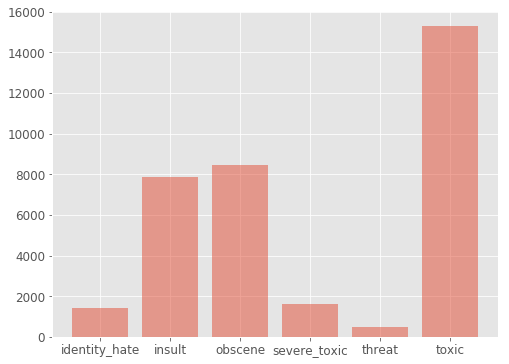

In [13]:
import matplotlib.pyplot as plt

num_comments = [toxic, severe_toxic, obscene, threat, insult, identity_hate]

objects = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
print(objects)
pos = np.arange(len(objects))
print (pos)
num_comments = [toxic, severe_toxic, obscene, threat, insult, identity_hate]
print(num_comments)
 
plt.bar(objects, num_comments, align='center', alpha=0.5)

plt.show()

## How many comments are friendly?

In [14]:
friendly = train.iloc[:,2:].sum(axis = 1)

In [15]:
train['friendly'] = (friendly == 0)
print ("Total comments ", len(train))
print ("Total clean comments ", train['friendly'].sum())

Total comments  159571
Total clean comments  143346


### Check the column names for the dataframe: train

In [16]:
list(train)

['id',
 'comment_text',
 'toxic',
 'severe_toxic',
 'obscene',
 'threat',
 'insult',
 'identity_hate',
 'friendly']

## Create correlation plot to see if some comments go together

In [17]:
# Take clean comment count out of df

corr_df = train.iloc[:,2:-1]

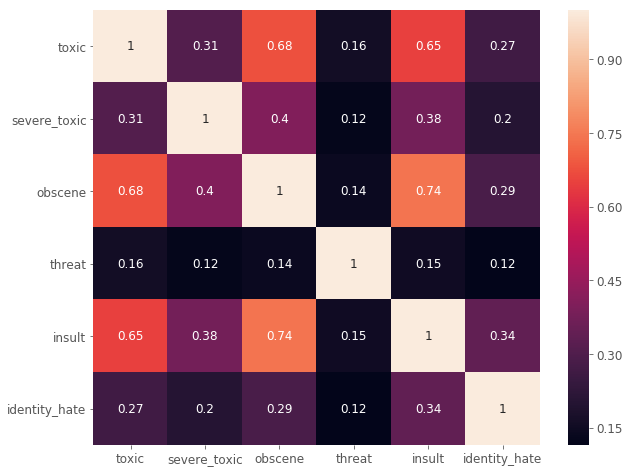

In [18]:
corr = corr_df.corr()

plt.figure(figsize = (10,8))
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values, annot = True)
plt.show()

### Some of the labels are higher correlated, e.g. insult-obscene has the highest at 0.74, followed by toxic-obscene and toxic-insult.

### Concatenate the train set and the test set and make a new dataframe, comment_length, containing the length of comments. Print out the new dataframe.

In [19]:
df = pd.concat([train, test], axis=0)

print(list(df))

comment_length = df['comment_text'].apply(len)

print(comment_length)

['comment_text', 'friendly', 'id', 'identity_hate', 'insult', 'obscene', 'severe_toxic', 'threat', 'toxic']
0          264
1          112
2          233
3          622
4           67
5           65
6           44
7          115
8          472
9           70
10        2875
11          56
12         319
13         819
14         219
15         610
16          57
17          48
18         118
19         440
20         266
21          58
22         543
23          97
24        1409
25         172
26         288
27         343
28         119
29          78
          ... 
153134     554
153135     144
153136     559
153137     274
153138     135
153139     314
153140     135
153141     234
153142     163
153143      18
153144     119
153145     541
153146     265
153147      63
153148     146
153149      51
153150     596
153151     181
153152      60
153153     382
153154      82
153155     137
153156     277
153157     255
153158      63
153159      60
153160     198
153161     423
153162 

In [20]:
df_len = pd.Series.to_frame(comment_length)

### Assign 'comment_text'  as column name.

In [21]:
df_len.columns = ['comment_text']

In [22]:
# Check the type of df_len

type(df_len)

pandas.core.frame.DataFrame

In [23]:
# verify column label

list(df_len)

['comment_text']

## Plot number of letters in each comment

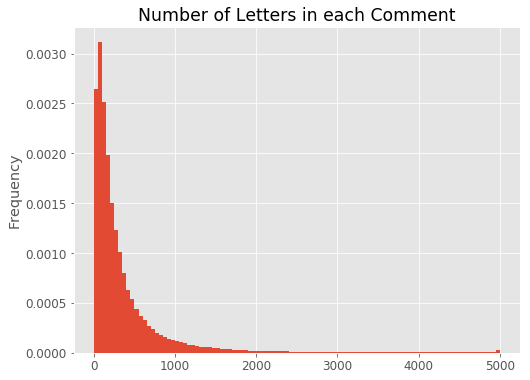

In [24]:
import matplotlib.pyplot as plt


letter_plot = df_len.plot(use_index = True, kind = 'hist', normed = 1, bins = 100, legend = None)
plt.title('Number of Letters in each Comment')

plt.show()

## Determine number of words in each comment and plot distribution

In [25]:
df.head()

,comment_text,friendly,id,identity_hate,insult,obscene,severe_toxic,threat,toxic
0,Explanation\nWhy the edits made under my usern...,True,0000997932d777bf,0.0,0.0,0.0,0.0,0.0,0.0
1,D'aww! He matches this background colour I'm s...,True,000103f0d9cfb60f,0.0,0.0,0.0,0.0,0.0,0.0
2,"Hey man, I'm really not trying to edit war. It...",True,000113f07ec002fd,0.0,0.0,0.0,0.0,0.0,0.0
3,"""\nMore\nI can't make any real suggestions on ...",True,0001b41b1c6bb37e,0.0,0.0,0.0,0.0,0.0,0.0
4,"You, sir, are my hero. Any chance you remember...",True,0001d958c54c6e35,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
df['word_count'] = df['comment_text'].apply(lambda x: len(str(x).split(" ")))
df[['comment_text','word_count']].head()

,comment_text,word_count
0,Explanation\nWhy the edits made under my usern...,42
1,D'aww! He matches this background colour I'm s...,18
2,"Hey man, I'm really not trying to edit war. It...",42
3,"""\nMore\nI can't make any real suggestions on ...",112
4,"You, sir, are my hero. Any chance you remember...",13


In [27]:
df['word_count'].max()

2834

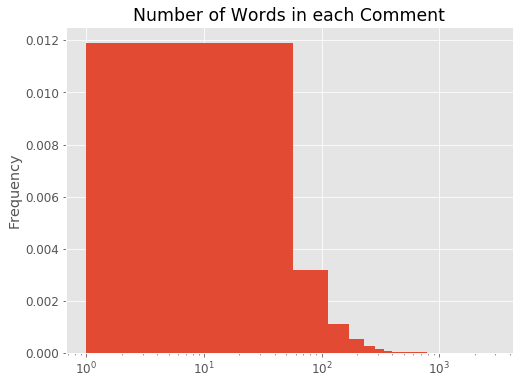

In [28]:
letter_plot = df['word_count'].plot(use_index = True, kind = 'hist', normed = 1, bins = 50, logx = True)
plt.title('Number of Words in each Comment')
bins = 25
legend = None

plt.show()

##  Drop comments less than 10 words in length from the data  frame

In [29]:
df = df.drop(df[df.word_count < 10].index)

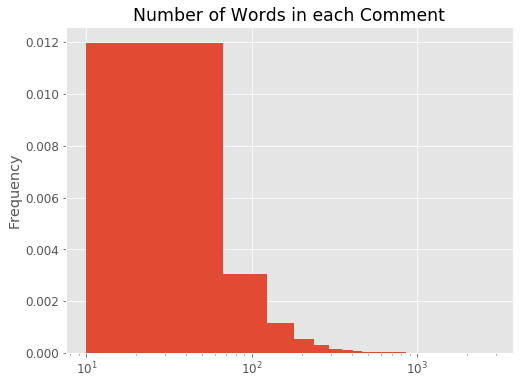

In [30]:
letter_plot = df['word_count'].plot(use_index = True, kind = 'hist', normed = 1, bins = 50, logx = True)
plt.title('Number of Words in each Comment')
bins = 25
legend = None

plt.show()

In [31]:
df.word_count.count()

231742

## Repeat the above steps for the separate train and test data sets

In [32]:
comment_length_train = train['comment_text'].apply(len)

In [33]:
train_len = pd.Series.to_frame(comment_length_train)

In [34]:
train_len.columns = ['comment_text']

In [35]:
type(train_len)

pandas.core.frame.DataFrame

In [36]:
train['word_count'] = train['comment_text'].apply(lambda x: len(str(x).split(" ")))
train[['comment_text','word_count']].head()

,comment_text,word_count
0,Explanation\nWhy the edits made under my usern...,42
1,D'aww! He matches this background colour I'm s...,18
2,"Hey man, I'm really not trying to edit war. It...",42
3,"""\nMore\nI can't make any real suggestions on ...",112
4,"You, sir, are my hero. Any chance you remember...",13


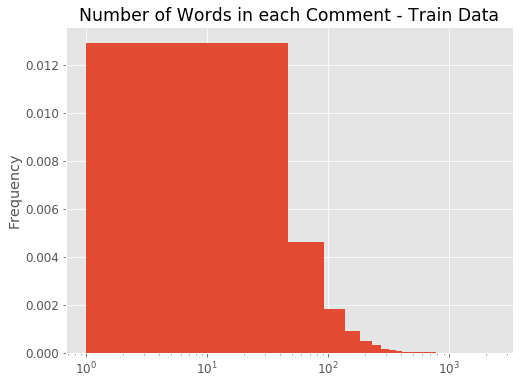

In [37]:
letter_plot = train['word_count'].plot(use_index = True, kind = 'hist', normed = 1, bins = 50, logx = True)
plt.title('Number of Words in each Comment - Train Data')
bins = 25
legend = None

plt.show()

In [38]:
comment_length_test = test['comment_text'].apply(len)

test_len = pd.Series.to_frame(comment_length_test)

test_len.columns = ['comment_text']

test['word_count'] = test['comment_text'].apply(lambda x: len(str(x).split(" ")))
test[['comment_text','word_count']].head()

,comment_text,word_count
0,Yo bitch Ja Rule is more succesful then you'll...,72
1,== From RfC == \n\n The title is fine as it is...,13
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",16
3,":If you have a look back at the source, the in...",38
4,I don't anonymously edit articles at all.,7


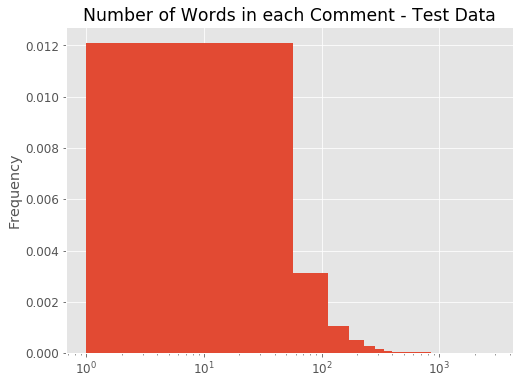

In [39]:
letter_plot = test['word_count'].plot(use_index = True, kind = 'hist', normed = 1, bins = 50, logx = True)
plt.title('Number of Words in each Comment - Test Data')
bins = 25
legend = None

plt.show()

In [40]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,friendly,word_count
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,True,42
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,True,18
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,True,42
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,True,112
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,True,13


## Find out which comments have multiple labels

In [41]:
columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [42]:
train['how_many'] = train[columns].sum(axis = 1)

count_mult_class = train['how_many'].value_counts()

print (count_mult_class)

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: how_many, dtype: int64


### From the above output:
####  5470 comments have one label
####  2678 comments have two labels
####  etc.

## Examples of comment types: 
### toxic, severe_toxic, obscene, threat, insult, identity_hate

In [43]:
print("toxic: ")
print(train[train.toxic == 1].iloc[1,1])

toxic: 
Hey... what is it..
@ | talk .
What is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP?

Ask Sityush to clean up his behavior than issue me nonsensical warnings...


In [44]:
print("severe_toxic: ")
print(train[train.severe_toxic == 1].iloc[1,1])

severe_toxic: 
Stupid peace of shit stop deleting my stuff asshole go die and fall in a hole go to hell!


In [45]:
print("obscene: ")
print(train[train.obscene == 1].iloc[1,1])

obscene: 
You are gay or antisemmitian? 

Archangel WHite Tiger

Meow! Greetingshhh!

Uh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...

1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!

2 - If you doubt words of the Bible, that homosexuality is a deadly sin, make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals!

3 - First and last warning, you fucking gay - I won't appreciate if any more nazi shwain would write in my page! I don't wish to talk to you anymore!

Beware of the Dark Side!


In [46]:
print("threat: ")
print(train[train.threat == 1].iloc[1,1])

threat: 
I think that your a Fagget get a oife and burn in Hell I hate you 'm sorry we cant have any more sex i'm running out of conndoms


In [47]:
print("insult: ")
print(train[train.insult == 1].iloc[1,1])

insult: 
You are gay or antisemmitian? 

Archangel WHite Tiger

Meow! Greetingshhh!

Uh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...

1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!

2 - If you doubt words of the Bible, that homosexuality is a deadly sin, make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals!

3 - First and last warning, you fucking gay - I won't appreciate if any more nazi shwain would write in my page! I don't wish to talk to you anymore!

Beware of the Dark Side!


In [48]:
print("identity_hate: ")
print(train[train.identity_hate == 1].iloc[1,1])

identity_hate: 
A pair of jew-hating weiner nazi schmucks.


## Drop comments less than 10 words in length from the Train data set

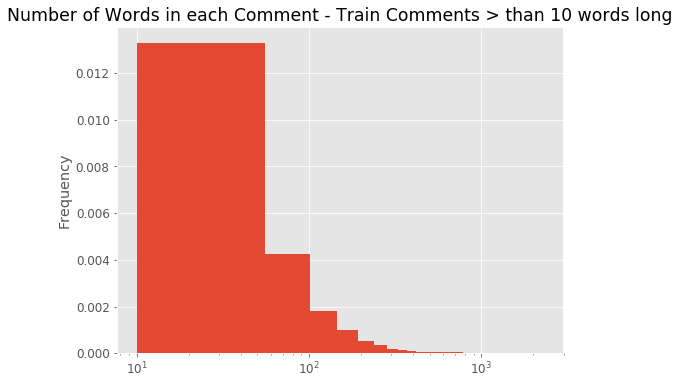

In [49]:
train = train.drop(train[train.word_count < 10].index)

letter_plot = train['word_count'].plot(use_index = True, kind = 'hist', normed = 1, bins = 50, logx = True)
plt.title('Number of Words in each Comment - Train Comments > than 10 words long')
bins = 25
legend = None

plt.show()

In [50]:
train.word_count.count()

139516

## Drop comments less than 10 words in length from the Test data set

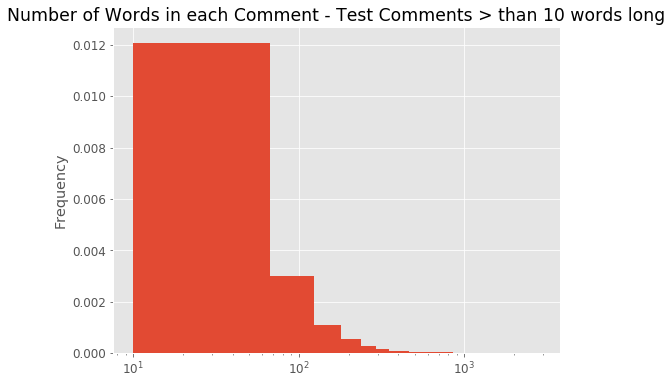

In [51]:
test = test.drop(test[test.word_count < 10].index)

letter_plot = test['word_count'].plot(use_index = True, kind = 'hist', normed = 1, bins = 50, logx = True)
plt.title('Number of Words in each Comment - Test Comments > than 10 words long')
bins = 25
legend = None

plt.show()

def f(row):
    if row['toxic'] == 1:
        val = 0
    elif row['severe_toxic'] == 1:
        val = 1
    elif row ['obscene'] == 1:
        val = 2
    elif row['threat'] == 1:
        val = 3
    elif row['insult'] == 1:
        val = 4
    elif row['identity_hate'] == 1:
        val = 5
    else:
        val = -1
    return val

train['f_toxic'] = f('toxic')

train['type_comment'] = train.append(lb)

In [52]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,friendly,word_count,how_many
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,True,42,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,True,18,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,True,42,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,True,112,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,True,13,0


## Visualize comments using Wordclouds

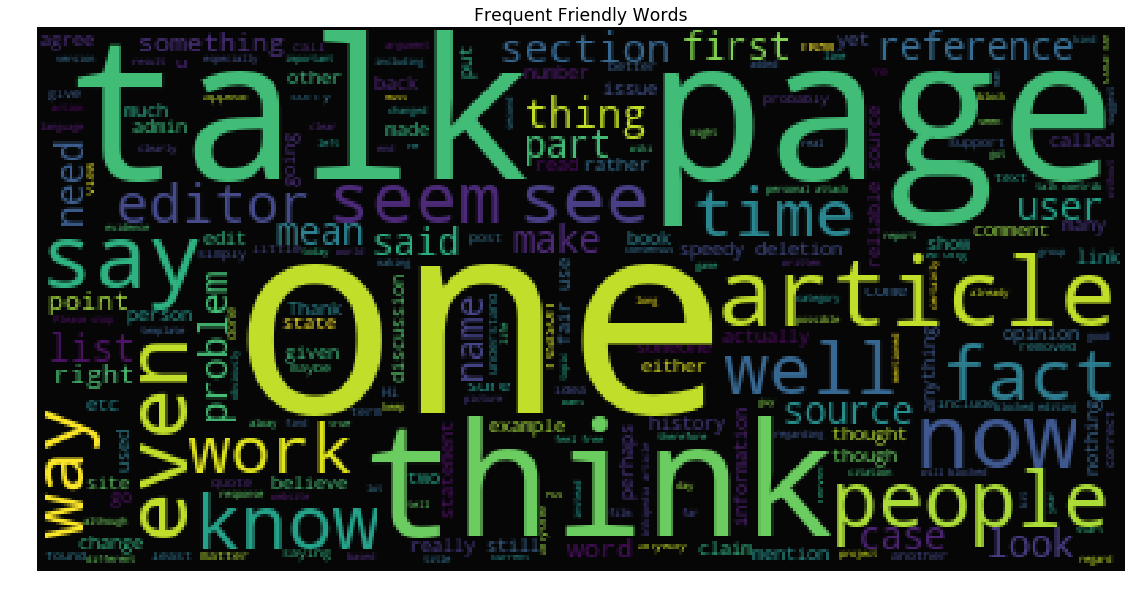

In [53]:
friendly_subset = train[train.friendly == True]

text = friendly_subset.comment_text.values
wc = WordCloud(background_color = 'black', max_words = 2000) #, stopwords = stopword)
wc.generate(" ".join(text))
plt.figure(figsize = (20, 10))
plt.axis('off')
plt.title('Frequent Friendly Words')
plt.imshow(wc.recolor(colormap = 'viridis', random_state = 20), alpha = 0.98)
plt.show()

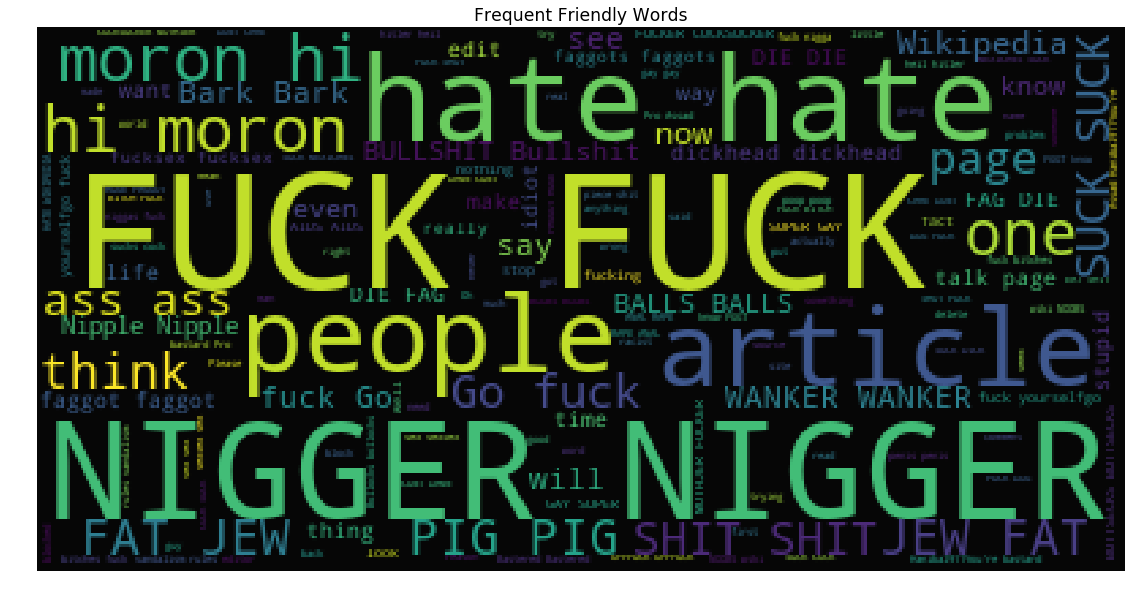

In [54]:
toxic_subset = train[train.toxic == 1]

text = toxic_subset.comment_text.values
wc = WordCloud(background_color = 'black', max_words = 2000) #, stopwords = stopword)
wc.generate(" ".join(text))
plt.figure(figsize = (20, 10))
plt.axis('off')
plt.title('Frequent Friendly Words')
plt.imshow(wc.recolor(colormap = 'viridis', random_state = 20), alpha = 0.98)
plt.show()

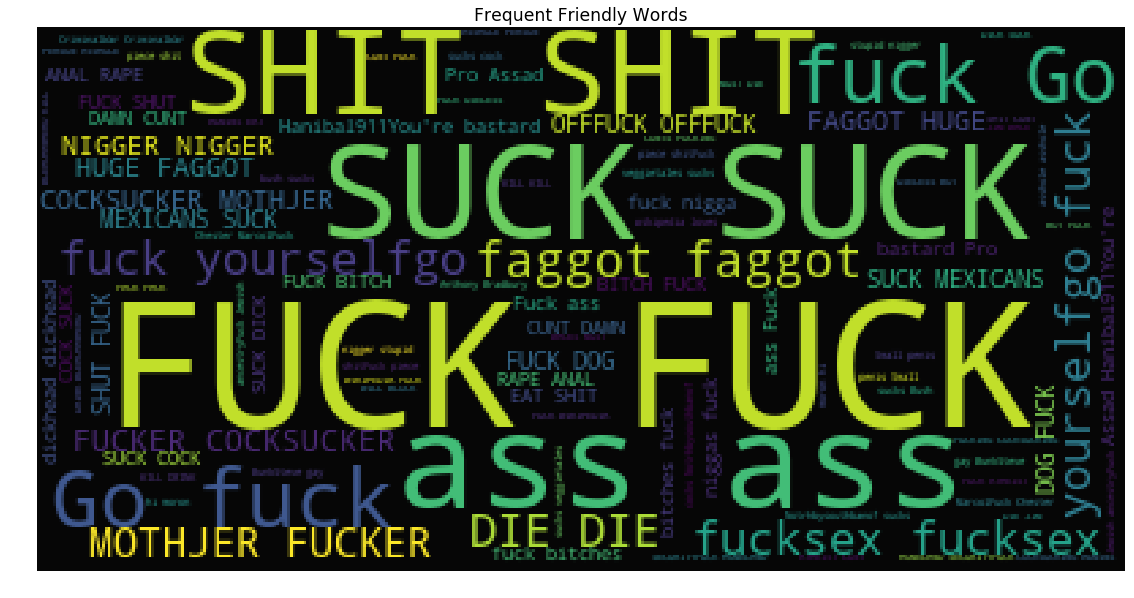

In [55]:
severe_toxic_subset = train[train.severe_toxic == 1]

text = severe_toxic_subset.comment_text.values
wc = WordCloud(background_color = 'black', max_words = 2000) #, stopwords = stopword)
wc.generate(" ".join(text))
plt.figure(figsize = (20, 10))
plt.axis('off')
plt.title('Frequent Friendly Words')
plt.imshow(wc.recolor(colormap = 'viridis', random_state = 20), alpha = 0.98)
plt.show()

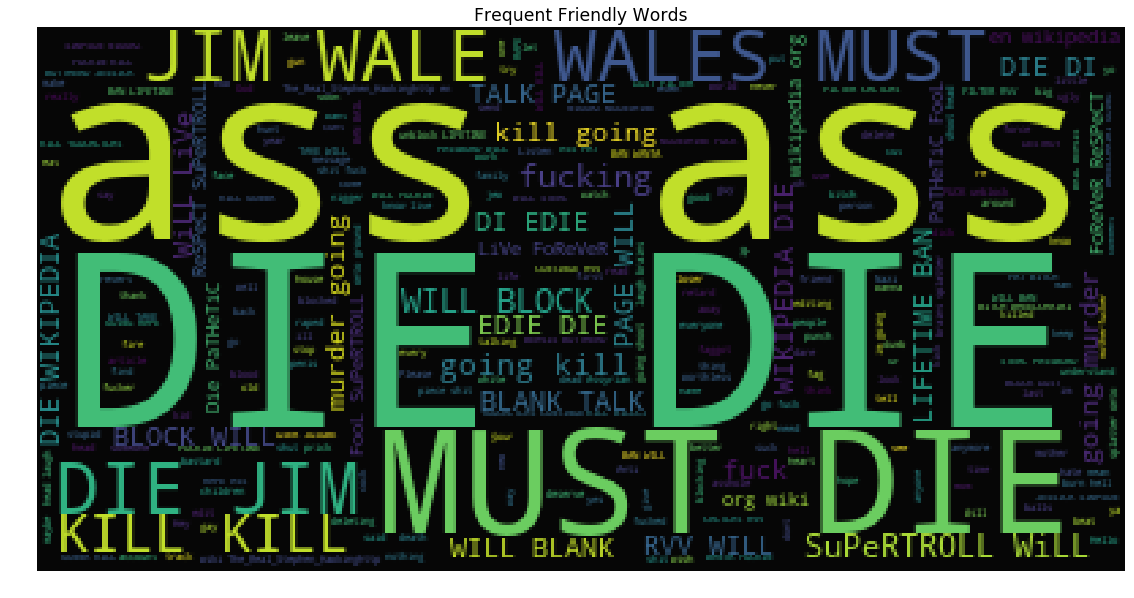

In [56]:
threat_subset = train[train.threat == 1]

text = threat_subset.comment_text.values
wc = WordCloud(background_color = 'black', max_words = 2000) #, stopwords = stopword)
wc.generate(" ".join(text))
plt.figure(figsize = (20, 10))
plt.axis('off')
plt.title('Frequent Friendly Words')
plt.imshow(wc.recolor(colormap = 'viridis', random_state = 20), alpha = 0.98)
plt.show()

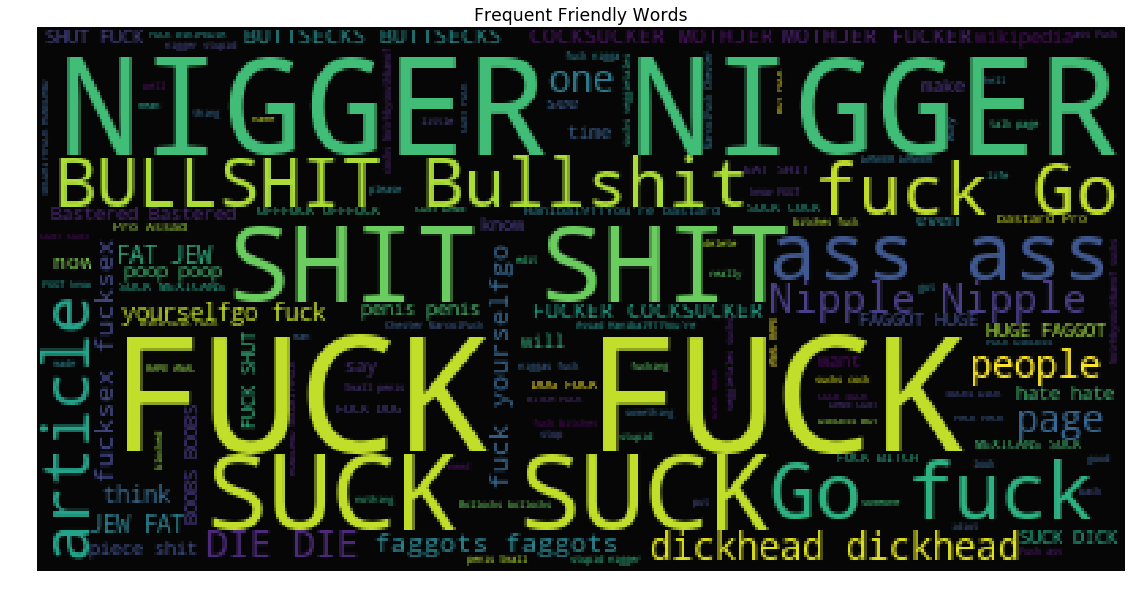

In [57]:
obscene_subset = train[train.obscene == 1]

text = obscene_subset.comment_text.values
wc = WordCloud(background_color = 'black', max_words = 2000) #, stopwords = stopword)
wc.generate(" ".join(text))
plt.figure(figsize = (20, 10))
plt.axis('off')
plt.title('Frequent Friendly Words')
plt.imshow(wc.recolor(colormap = 'viridis', random_state = 20), alpha = 0.98)
plt.show()

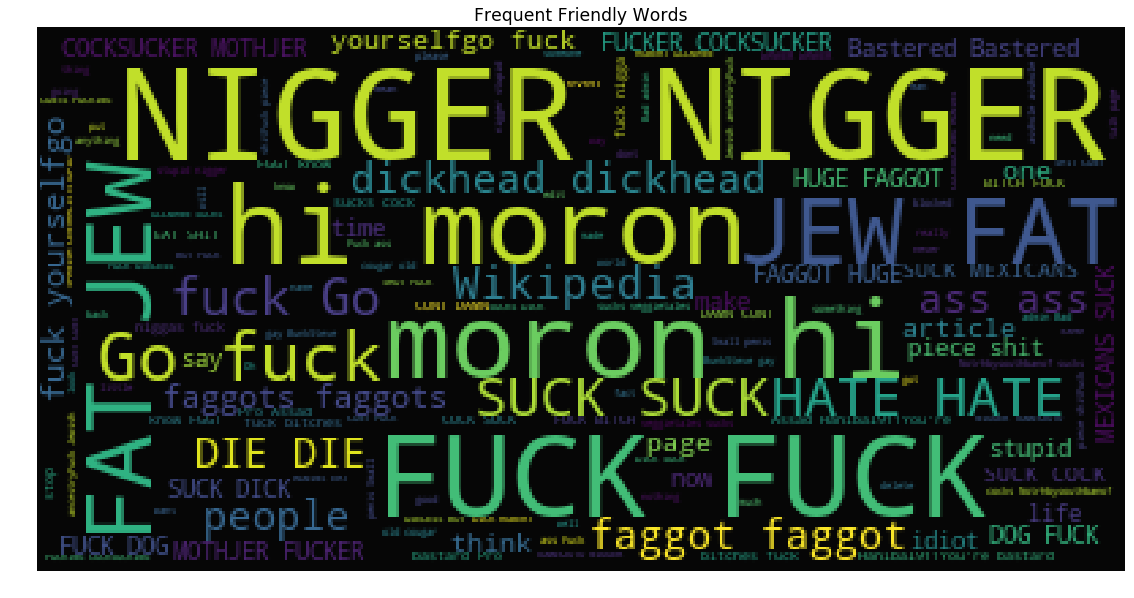

In [58]:
insult_subset = train[train.insult == 1]

text = insult_subset.comment_text.values
wc = WordCloud(background_color = 'black', max_words = 2000) #, stopwords = stopword)
wc.generate(" ".join(text))
plt.figure(figsize = (20, 10))
plt.axis('off')
plt.title('Frequent Friendly Words')
plt.imshow(wc.recolor(colormap = 'viridis', random_state = 20), alpha = 0.98)
plt.show()

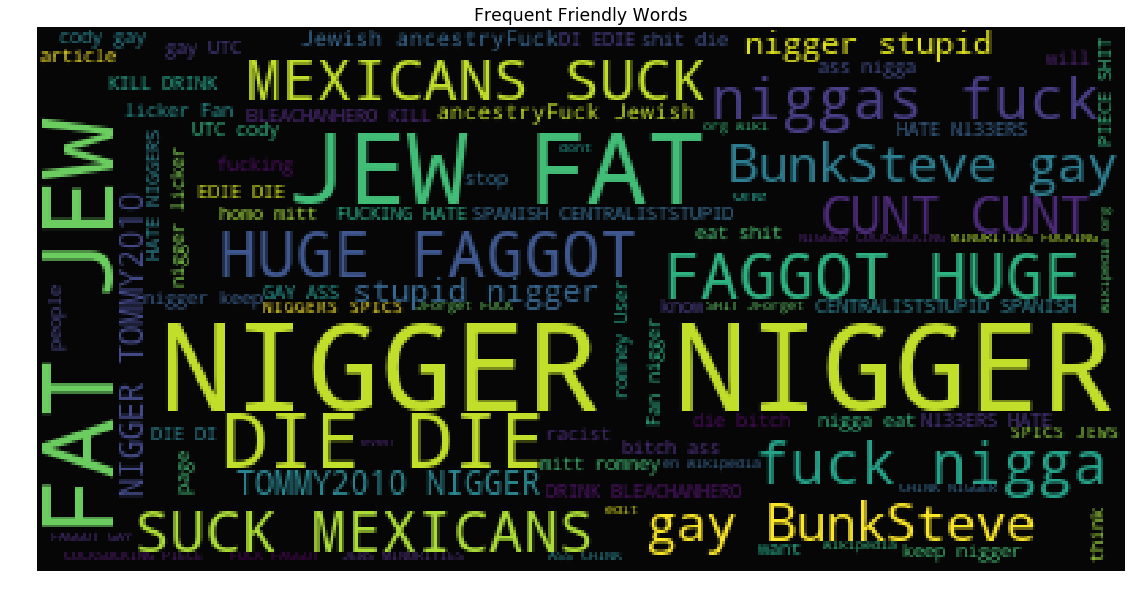

In [59]:
identity_hate_subset = train[train.identity_hate == 1]

text = identity_hate_subset.comment_text.values
wc = WordCloud(background_color = 'black', max_words = 2000) #, stopwords = stopword)
wc.generate(" ".join(text))
plt.figure(figsize = (20, 10))
plt.axis('off')
plt.title('Frequent Friendly Words')
plt.imshow(wc.recolor(colormap = 'viridis', random_state = 20), alpha = 0.98)
plt.show()

## Tokenization

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [61]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,friendly,word_count,how_many
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,True,42,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,True,18,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,True,42,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,True,112,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,True,13,0


In [62]:
test.head()

,id,comment_text,word_count
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,72
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,13
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",16
3,00017563c3f7919a,":If you have a look back at the source, the in...",38
5,0001ea8717f6de06,Thank you for understanding. I think very high...,16


## Clean the comment text

In [78]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [79]:
train['comment_text'] = train['comment_text']. map (lambda com : clean_text(com))

In [80]:
train['comment_text'] = train['comment_text']. map (lambda com : clean_text(com))

In [63]:
y = train.how_many

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [65]:
X_train, X_test, y_train, y_test = train_test_split(train['comment_text'], y, test_size = 0.33, random_state = 53)

In [66]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

In [67]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [68]:
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [69]:
import re, string
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s): return re_tok.sub(r' \1 ', s).split()

## Create a numerical feature vector for each comment

## Initialize a CountVectorizer object

In [70]:
count_vectorizer = CountVectorizer(stop_words = 'english')

vect = CountVectorizer(tokenizer=tokenize)
tf_train = vect.fit_transform(X_train)
tf_test = vect.transform(X_test)

In [71]:
tf_train

<93475x146617 sparse matrix of type '<class 'numpy.int64'>'
	with 5259378 stored elements in Compressed Sparse Row format>

In [72]:
tf_test

<46041x146617 sparse matrix of type '<class 'numpy.int64'>'
	with 2507123 stored elements in Compressed Sparse Row format>

## Build a classifier

In [73]:
print(tf_train)

  (0, 48317)	1
  (0, 36303)	1
  (0, 10710)	1
  (0, 99837)	1
  (0, 33335)	1
  (0, 15575)	1
  (0, 141104)	1
  (0, 0)	1
  (0, 84802)	1
  (0, 6)	1
  (0, 24615)	1
  (0, 10738)	1
  (0, 139738)	1
  (0, 92338)	2
  (0, 117250)	2
  (0, 52382)	1
  (0, 11926)	1
  (0, 89348)	1
  (0, 134207)	1
  (0, 76101)	1
  (0, 7054)	2
  (0, 54743)	1
  (0, 13)	2
  (0, 77512)	2
  (0, 89665)	1
  :	:
  (93474, 140060)	3
  (93474, 12945)	1
  (93474, 127053)	7
  (93474, 90233)	6
  (93474, 11)	34
  (93474, 89628)	2
  (93474, 7)	20
  (93474, 76236)	2
  (93474, 127089)	48
  (93474, 7018)	3
  (93474, 8370)	1
  (93474, 18122)	1
  (93474, 13968)	9
  (93474, 111162)	3
  (93474, 10710)	4
  (93474, 33335)	2
  (93474, 139738)	1
  (93474, 92338)	4
  (93474, 11926)	8
  (93474, 7054)	10
  (93474, 54743)	1
  (93474, 13)	34
  (93474, 131757)	1
  (93474, 118508)	3
  (93474, 63078)	13


In [74]:
print(tf_test)

  (0, 6)	1
  (0, 11)	2
  (0, 13)	4
  (0, 7017)	1
  (0, 11741)	2
  (0, 11926)	1
  (0, 13968)	1
  (0, 14578)	1
  (0, 14764)	1
  (0, 15438)	1
  (0, 16082)	1
  (0, 18882)	1
  (0, 20468)	1
  (0, 27716)	1
  (0, 33335)	1
  (0, 37140)	1
  (0, 38928)	1
  (0, 43570)	1
  (0, 52519)	1
  (0, 52576)	1
  (0, 59340)	1
  (0, 60015)	1
  (0, 60237)	1
  (0, 60567)	1
  (0, 63583)	1
  :	:
  (46040, 112607)	1
  (46040, 117149)	2
  (46040, 118508)	1
  (46040, 118965)	1
  (46040, 126618)	1
  (46040, 127014)	1
  (46040, 127053)	2
  (46040, 127089)	9
  (46040, 128515)	1
  (46040, 128631)	2
  (46040, 128804)	1
  (46040, 131517)	1
  (46040, 134408)	1
  (46040, 134589)	1
  (46040, 137891)	2
  (46040, 137973)	1
  (46040, 138106)	1
  (46040, 138195)	1
  (46040, 138950)	2
  (46040, 139160)	1
  (46040, 139441)	1
  (46040, 140875)	1
  (46040, 142247)	1
  (46040, 142709)	1
  (46040, 143782)	2


## Transform the test data using only the text column values

In [75]:
count_test = count_vectorizer.fit_transform(X_test)

## Print the first 10 features of the count_vectorizer

In [76]:
print(count_vectorizer.get_feature_names()[:10])

['00', '000', '0000', '00000', '000000', '0000000', '00000000', '0000000027', '00000001', '0000035']


In [77]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train) 
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
knn.predict(X_test)

ValueError: could not convert string to float: '"\n\nFair enough, mistakes happen. no problem ☺.\nI am attempting to move this discussion to the talk page for the article in question, however, I will respond to the specific issues you seem to be having here.\nYou seem to be mincing terms (“view such fonts as Unicode” — reality is actually closer to the reverse of this statement), and (understandably) confusing very different subjects (characters, glyphs, fonts). I will try my best to address/explain what I assume to be the underlying issues (rather than just the symptoms).\n\nThe change I made to the article was nothing to do with fonts (that was only apparent to you specifically, the character exsited, and was likely downloaded sucessfully, but the font in use didn’t have a glyph to display it — the solution is simple: use a better font if you wish to see the glyph for the character). All I did was use the correct character (further discussion on the article talk page once I finish typing it).\n\nUnicode is the standard character encoding these days, all others are now considered legacy. US-ASCII and ISO 8859-1 can both be treated/processed as UTF-8 (a character encoding for Unicode). Notable operating systems, and major applications in their entirity now use Unicode as their character encoding of choice, adding/allowing backwards-compatibility where needed (at least in good quality products/packages). This includes the majority of Microsoft products.\nU+XXXX numbers are Unicode code points, an easy way to referrence specific characters without ambiguity, and need not concern the average person browsing the web.\nWikipedia pages are sent to you as UTF-8 (Unicode), so you’re ‘viewing them as Unicode’ anyway.\nFonts for US-ASCII/ISO 8859-1 are inter-changable in modern operating systems. The software with which you’re viewing this page is very likely written using Unicode character encoding (operating system & web browser).\n\nPart of the reason for using the actual character natively in headings (on talk pages at least) was so that others could easily determine if their default system/browser configuration supported a more suitable range of characters, in order to be able to provide feedback about said character. It’s not like a missing glyph is causing an application failure (in which case I could understand your concerns).\n\nYour claim that “My point is … about everybody else who can’t see the font correctly.” is seemingly baseless. Where is your evidence that anyone beyond yourself is having trouble seeing the glyph for this character? What about the people for whom the use of correct characters will help (those using speech-synthisis software)? If you can provide citation/evidence for this rather wild claim, I’d like to read it, otherwise I can’t help but feel you’re merely expressing your own wishes/preferrences/desires, dispite the other issues. What, beyond the issues you’ve encountered personally, are the reasons behind your disagreement with my changes? It seems that perhaps these articles are a little too close to your heart based on the nature and speed of your response(es) to the change.\n\n“Article names here should be as simple as possible.” [emphasis; mine.]\nNo, article names should be as clear as possible, or as simple to comprehend/understand as possible, or provide for simplest readability. I suggest it may be worthwhile to read about the subject of usability (which is the dicipline concerned with making things easy to use).\nTaking your argument further; should punctuation be removed too, as that would make titles much simpler, although less clear. Removing punctuation would mitigate the need to use percent-encoding in URLs, making MediaWiki itself simpler (although less flexible). I realise my example is counter-intuitive, but it was to emphasise the point that clarity, above all else is actually what’s important, not simplicity. A parallel example is user-interfaces; the most usable are not those which are simplest, but those which display the right information at the right time (clarity).\n\nI’m familiar with how screen-readers function/operate. Not all ‘ride’ on top of the user’s browser. Blind people are not the only users of speech-synthisis software. \nBesides, you’re confusing the visual rendering of a charater (a glyph) with the character itself, and other representatinos/renderings of it (such as audio/speech). Modern screen-readers access the source-code of the page (the browser itself is just a vehicle to get to the desired page and/or aquire the source-code itself, along with the character encoding). So they’re given'

## Initialize a TfidVectorizer object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', max_df = 0.7)

## Transform the training data

In [ ]:
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

print(tfidf_train)

## Transform the test data

In [ ]:
tfidf_test = tfidf_vectorizer.transform(X_test)

## Print the first 10 features

In [ ]:
print(tfidf_vectorizer.get_feature_names()[:10])

## Print the first 5 vectors of the tfidf training data

In [ ]:
print(tfidf_train[:5].A)

In [ ]:
type(count_train)

import scipy
from scipy.sparse import csr_matrix
#csr_matrix(count_train).toarray()
#count_train.A
count_train.todense()
#count_train = count_train.A

## Creat the CountVectorizer dataframe

In [ ]:
count_df = pd.DataFrame(count_train, columns=count_vectorizer.get_feature_names())

In [ ]:
print (count_train)

In [ ]:
print(count_vectorizer.get_feature_names())

## Trying to figure out the count_train.A

In [ ]:
print(tfidf_train[:5])

In [ ]:
print(count_train.A)

In [ ]:
count_df = pd.DataFrame(count_train.A, columns =  count_vectorizer.get_feature_names())